In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel, linear_kernel, cosine_similarity

In [2]:
data = pd.read_csv("Engineering_books_data.csv", encoding ="latin-1")

In [3]:
data

,title,author,image,desc,download_link,pages,publisher,year,language,file
0,"Soil Mechanics of Earthworks, Foundations and ...",NaN,https://covers.zlibcdn2.com/covers100/books/01...,\n This is the third volume...,https://1lib.in/dl/2279969/9cd462,354.0,Elsevier Science,1988.0,english,"PDF, 9.35 MB"
1,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256.0,Taylor & Francis,2006.0,english,"PDF, 86.52 MB"
2,Practical Problems in Soil Mechanics and Found...,Sheng Y. Peng,https://covers.zlibcdn2.com/covers100/books/7d...,NaN,https://1lib.in/dl/2800423/3ccf77,346.0,Elsevier Science Ltd,1985.0,english,"PDF, 9.86 MB"
3,Underwater Embankments on Soft Soil A Case His...,William F. van Impe,https://covers.zlibcdn2.com/covers100/books/2b...,NaN,https://1lib.in/dl/981008/e79e1d,154.0,NaN,2007.0,english,"PDF, 3.35 MB"
4,Eco- and Ground Bio-Engineering: The Use of Ve...,Alexia Stokes,https://covers.zlibcdn2.com/covers100/books/d2...,\n This volume brings toget...,https://1lib.in/dl/901430/e57c96,420.0,NaN,2007.0,english,"PDF, 10.67 MB"
...,...,...,...,...,...,...,...,...,...,...
2370,Search Engines: Information Retrieval in Practice,W. Bruce Croft,https://covers.zlibcdn2.com/covers100/books/01...,NaN,https://1lib.in/dl/5148053/69b42b,542.0,Pearson,2009.0,english,"PDF, 9.11 MB"
2371,Web Information Retrieval,Stefano Ceri,https://covers.zlibcdn2.com/covers100/books/8e...,\nWith the proliferation of huge amounts of (h...,https://1lib.in/dl/2167059/097330,284.0,Springer-Verlag Berlin Heidelberg,2013.0,english,"PDF, 7.44 MB"
2372,Modern Information Retrieval,Ricardo Baeza-Yates,https://covers.zlibcdn2.com/covers100/books/7f...,\n Discusses the changes in...,https://1lib.in/dl/605897/eb0156,103.0,ACM Press; Addison-Wesley,1999.0,english,"PDF, 1.95 MB"
2373,Information Access through Search Engines and ...,Maristella Agosti (Editor),https://covers.zlibcdn2.com/covers100/books/a7...,\n The Information Manageme...,https://1lib.in/dl/937104/93711b,214.0,NaN,2007.0,english,"PDF, 3.67 MB"


In [4]:
data.shape

(2375, 10)

In [5]:
# Droping the data having NaN values 
data = data.dropna()
data = data.reset_index(drop=True)

In [6]:
data.isnull().sum()

title            0
author           0
image            0
desc             0
download_link    0
pages            0
publisher        0
year             0
language         0
file             0
dtype: int64

In [7]:
# Droping the data whose description in NaN
data = data[data['desc'] !='Unknown']
data = data.reset_index(drop=True)
data.shape

(1439, 10)

In [8]:
# Droping the data whose download link in NaN
data = data[data['download_link'] != 'Unknown']
data = data.reset_index(drop=True)
data.shape

(1439, 10)

In [9]:
unknown_author = data[data['author'] == 'Unknown']
unknown_desc = data[data['desc'] == 'Unknown']
unknown_download_link = data[data['download_link'] == 'Unknown']
unknown_pages = data[data['pages'] == 'Unknown']
unknown_publisher = data[data['publisher'] == 'Unknown']
unknown_year = data[data['year'] == 'Unknown']
unknown_language = data[data['language'] == 'Unknown']
unknown_file = data[data['file'] == 'Unknown']
unknown_img = data[data['image'] == 'Unknown']

In [10]:
# Checking wheather there are any other important missing values 
print('unknown authors:', len(unknown_author))
print('unknown desc:',len(unknown_desc))
print('unknown download link:', len(unknown_download_link))
print('unknown pages:', len(unknown_pages))
print('unknown publisher:', len(unknown_publisher))
print('unknown year:', len(unknown_year))
print('unknown language:', len(unknown_language))
print('unknown file:', len(unknown_file))
print('unknown image:', len(unknown_img))

unknown authors: 0
unknown desc: 0
unknown download link: 0
unknown pages: 0
unknown publisher: 0
unknown year: 0
unknown language: 0
unknown file: 0
unknown image: 0


In [11]:
# changing to lower case inorder to droping duplicate title 
data['lower title'] = data['title'].str.lower()
data = data.drop_duplicates(subset=['lower title'])
data = data.reset_index(drop=True)
data.shape

(1214, 11)

In [12]:
# Getting the length of the title
data['title length'] = data.title.apply(len)

C:\Users\imert\AppData\Local\Temp\ipykernel_2468\3765079846.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['title length'])


<Axes: xlabel='title length', ylabel='Density'>

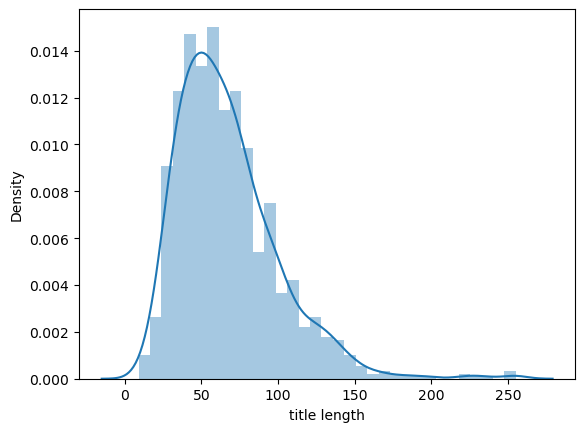

In [13]:
# distribution of length of the title
sns.distplot(data['title length'])

In [14]:
# Removing some Outliers(title length which are more the 180 char)
data = data[data['title length'] < 180]
data = data.reset_index(drop=True)

C:\Users\imert\AppData\Local\Temp\ipykernel_2468\2566382381.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['title length'])


<Axes: xlabel='title length', ylabel='Density'>

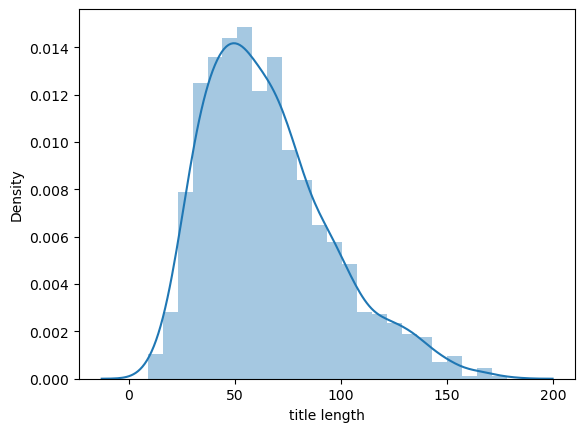

In [15]:
# Distribution after removing outliers
sns.distplot(data['title length'])

In [16]:
data.shape

(1203, 12)

In [17]:
# Description length
data['desc_length'] = data.desc.apply(len)

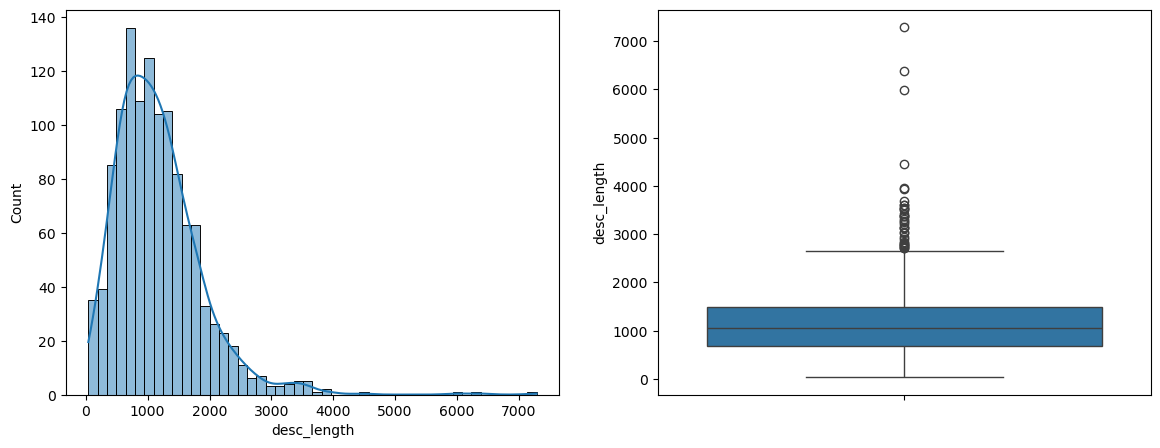

In [18]:
#Distribution and boxplot for description length
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data.desc_length, kde=True)

plt.subplot(1,2,2)
sns.boxplot(data.desc_length)
plt.show()

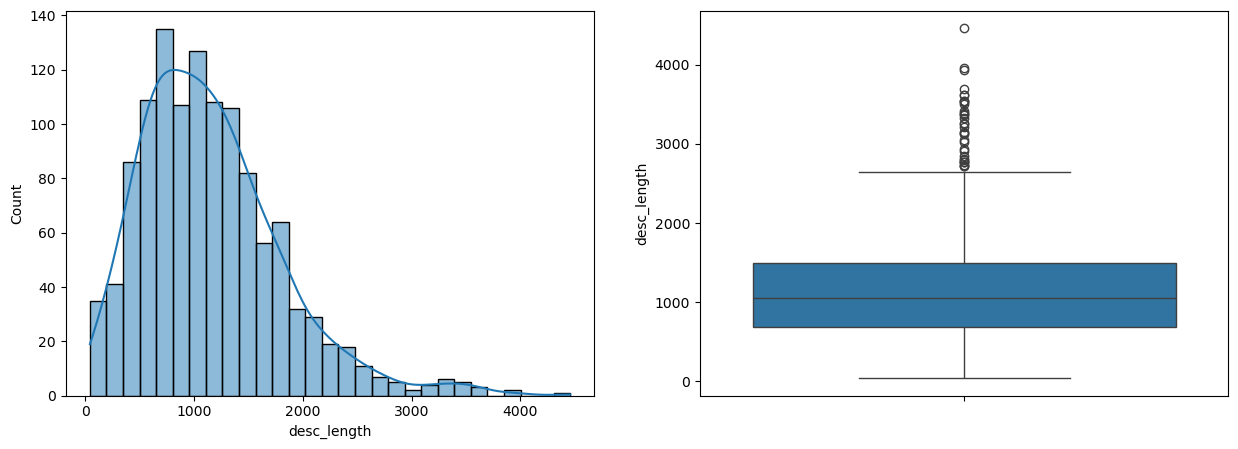

In [19]:
# removing records whose desc length is more the 5000
data = data[data['desc_length']<5000]
data = data.reset_index(drop=True)

# ploting Distribution and boxplot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data.desc_length, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data.desc_length)
plt.show()

In [20]:
# cleaning description
data['clean desc'] = ''  # Yeni sütunu başlatma
for i in range(data.shape[0]):
    splited = data.loc[i, 'desc'].split()  # Her bir satırı almak için loc kullanımı
    clean_data = ' '.join(splited)  # Temizleme işlemi
    data.loc[i, 'clean desc'] = clean_data  # Yeni değeri loc ile atama


In [21]:
data.head()

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length,desc_length,clean desc
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256.0,Taylor & Francis,2006.0,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144,1337,Residual soils are found in many parts of the ...
1,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529.0,Cambridge University Press,2019.0,english,"PDF, 11.50 MB",principles of thermodynamics,28,1018,"In this introductory textbook, thermodynamics ..."
2,Thermodynamics: An Engineering Approach 8th Ed...,Yunus A. Ãengel,https://covers.zlibcdn2.com/covers100/books/6a...,"\nThermodynamics, An Engineering Approach, eig...",https://1lib.in/dl/2577672/7b237e,1115.0,McGraw-Hill Education,2014.0,english,"PDF, 64.77 MB",thermodynamics: an engineering approach 8th ed...,51,1195,"Thermodynamics, An Engineering Approach, eight..."
3,Thermal Physics: Thermodynamics and Statistica...,Robert F. Sekerka,https://covers.zlibcdn2.com/covers100/books/d0...,\nIn Thermal Physics: Thermodynamics and Stati...,https://1lib.in/dl/2717455/9a083e,610.0,Elsevier,2015.0,english,"PDF, 7.57 MB",thermal physics: thermodynamics and statistica...,86,1578,In Thermal Physics: Thermodynamics and Statist...
4,"Fundamentals of Physics: Mechanics, Relativity...",R. Shankar,https://covers.zlibcdn2.com/covers100/books/15...,"\n Professor R. Shankar, a ...",https://1lib.in/dl/2577615/46ed97,464.0,Yale University Press,2014.0,english,"PDF, 3.80 MB","fundamentals of physics: mechanics, relativity...",66,1105,"Professor R. Shankar, a well-known physicist a..."


In [22]:
# Creating new columns for recommendation using desc and title
data['recommend char'] = data['title'].str.lower() +' '+ data['clean desc'].str.lower()
data.head()

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length,desc_length,clean desc,recommend char
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256.0,Taylor & Francis,2006.0,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144,1337,Residual soils are found in many parts of the ...,foundation engineering: design and constructio...
1,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529.0,Cambridge University Press,2019.0,english,"PDF, 11.50 MB",principles of thermodynamics,28,1018,"In this introductory textbook, thermodynamics ...",principles of thermodynamics in this introduct...
2,Thermodynamics: An Engineering Approach 8th Ed...,Yunus A. Ãengel,https://covers.zlibcdn2.com/covers100/books/6a...,"\nThermodynamics, An Engineering Approach, eig...",https://1lib.in/dl/2577672/7b237e,1115.0,McGraw-Hill Education,2014.0,english,"PDF, 64.77 MB",thermodynamics: an engineering approach 8th ed...,51,1195,"Thermodynamics, An Engineering Approach, eight...",thermodynamics: an engineering approach 8th ed...
3,Thermal Physics: Thermodynamics and Statistica...,Robert F. Sekerka,https://covers.zlibcdn2.com/covers100/books/d0...,\nIn Thermal Physics: Thermodynamics and Stati...,https://1lib.in/dl/2717455/9a083e,610.0,Elsevier,2015.0,english,"PDF, 7.57 MB",thermal physics: thermodynamics and statistica...,86,1578,In Thermal Physics: Thermodynamics and Statist...,thermal physics: thermodynamics and statistica...
4,"Fundamentals of Physics: Mechanics, Relativity...",R. Shankar,https://covers.zlibcdn2.com/covers100/books/15...,"\n Professor R. Shankar, a ...",https://1lib.in/dl/2577615/46ed97,464.0,Yale University Press,2014.0,english,"PDF, 3.80 MB","fundamentals of physics: mechanics, relativity...",66,1105,"Professor R. Shankar, a well-known physicist a...","fundamentals of physics: mechanics, relativity..."


In [23]:
data['recommend char'][1]

"principles of thermodynamics in this introductory textbook, thermodynamics is presented as a natural extension of mechanics, so that the laws and concepts learned in mechanics serve to get acquainted with the theory. the foundations of thermodynamics are presented in the first part. the second part covers a wide range of applications, which are of central importance in the fields of physics, chemistry and engineering, including calorimetry, phase transitions, heat engines and chemical reactions. in the third part, devoted to continuous media, fourier and fick's laws, diffusion equations and many transport effects are derived using a unified approach. each chapter concludes with a selection of worked examples and several exercises, to reinforce key concepts under discussion. a full solutions manual is available at the end of the book. it contains more than 150 problems based on contemporary issues faced by scientists and engineers that are solved in detail for undergraduate and graduat

In [24]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imert\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
#some stopwords are added...to get better results
my_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "youre", "youve", "youll", "youd", 
                'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
                'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
                'who', 'whom', 'this', 'that', "thatll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 
                'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
                'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
                'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 
                'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
                'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 
                'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "dont", 'should', 
                "shouldve", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "arent", 'couldn', "couldnt", 
                'didn', "didnt", 'doesn', "doesnt", 'hadn', "hadnt", 'hasn', "hasnt", 'haven', "havent", 'isn', "isnt", 
                'ma', 'mightn', "mightnt", 'mustn', "mustnt", 'needn', "neednt", 'shan', "shant", 'shouldn', "shouldnt", 
                'wasn', "wasnt", 'weren', "werent", 'won', "wont", 'wouldn', "wouldnt",'book','many','also','may','part','chapter',
                'use','edition','course','first','second','third','fourth','fifth','sixth','seventh','every','textbook','using',
                'two','much','way','useful','provide','include','ha','including','one','page','used','today','take','based']

In [26]:
def cleaning(message):
    text = [char for char in message if char not in string.punctuation] #removing punctuation
    text = ''.join(text)
    text = [lemmatizer.lemmatize(word) for word in text.split()]  #using lemmatization
    text = ' '.join(text)
    text = [word for word in text.split() if word.lower() not in my_stopwords]   #removing stopwords
    text = ' '.join(text)
    return text

In [27]:
# cleaning by removing punctuation, stopwords and lemmatization
data['recommend char'] = data['recommend char'].apply(cleaning)
data['recommend char'][1]

'principle thermodynamics introductory thermodynamics presented natural extension mechanic law concept learned mechanic serve get acquainted theory foundation thermodynamics presented cover wide range application central importance field physic chemistry engineering calorimetry phase transition heat engine chemical reaction devoted continuous medium fourier ficks law diffusion equation transport effect derived unified approach concludes selection worked example several exercise reinforce key concept discussion full solution manual available end contains 150 problem contemporary issue faced scientist engineer solved detail undergraduate graduate student'

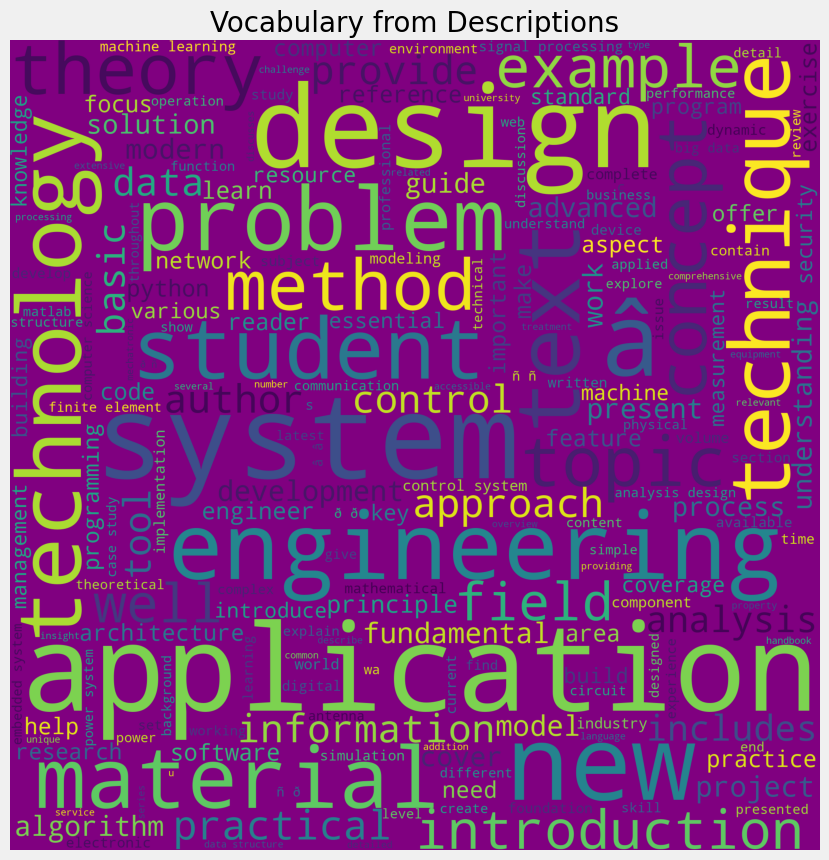

In [28]:
#most frequently present words in recommend char
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'purple', width = 2000, height = 2000).generate(' '.join(list(data['recommend char'])))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Descriptions", fontsize = 20)
plt.show()

In [29]:
data['recommend char2'] = data['lower title'].apply(cleaning)

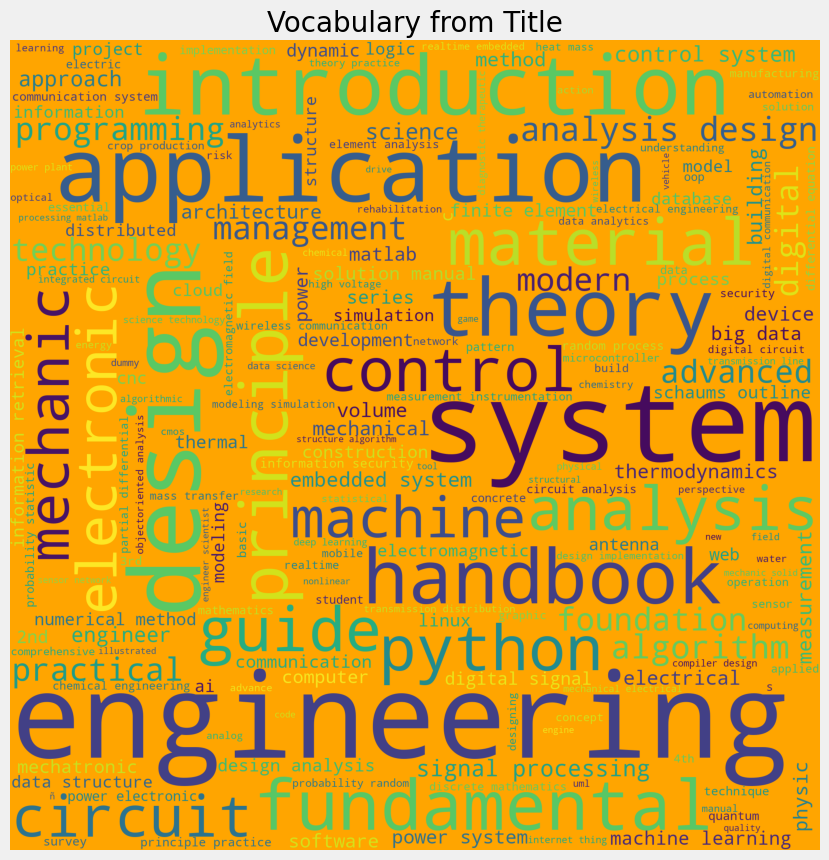

In [30]:
#most frequent present words in recommend char2

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'orange', width = 2000, height = 2000).generate(' '.join(list(data['recommend char2'])))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Title", fontsize = 20)
plt.show()

In [31]:
data.shape

(1200, 16)

In [32]:
data

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length,desc_length,clean desc,recommend char,recommend char2
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256.0,Taylor & Francis,2006.0,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144,1337,Residual soils are found in many parts of the ...,foundation engineering design construction tro...,foundation engineering design construction tro...
1,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529.0,Cambridge University Press,2019.0,english,"PDF, 11.50 MB",principles of thermodynamics,28,1018,"In this introductory textbook, thermodynamics ...",principle thermodynamics introductory thermody...,principle thermodynamics
2,Thermodynamics: An Engineering Approach 8th Ed...,Yunus A. Ãengel,https://covers.zlibcdn2.com/covers100/books/6a...,"\nThermodynamics, An Engineering Approach, eig...",https://1lib.in/dl/2577672/7b237e,1115.0,McGraw-Hill Education,2014.0,english,"PDF, 64.77 MB",thermodynamics: an engineering approach 8th ed...,51,1195,"Thermodynamics, An Engineering Approach, eight...",thermodynamics engineering approach 8th thermo...,thermodynamics engineering approach 8th
3,Thermal Physics: Thermodynamics and Statistica...,Robert F. Sekerka,https://covers.zlibcdn2.com/covers100/books/d0...,\nIn Thermal Physics: Thermodynamics and Stati...,https://1lib.in/dl/2717455/9a083e,610.0,Elsevier,2015.0,english,"PDF, 7.57 MB",thermal physics: thermodynamics and statistica...,86,1578,In Thermal Physics: Thermodynamics and Statist...,thermal physic thermodynamics statistical mech...,thermal physic thermodynamics statistical mech...
4,"Fundamentals of Physics: Mechanics, Relativity...",R. Shankar,https://covers.zlibcdn2.com/covers100/books/15...,"\n Professor R. Shankar, a ...",https://1lib.in/dl/2577615/46ed97,464.0,Yale University Press,2014.0,english,"PDF, 3.80 MB","fundamentals of physics: mechanics, relativity...",66,1105,"Professor R. Shankar, a well-known physicist a...",fundamental physic mechanic relativity thermod...,fundamental physic mechanic relativity thermod...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Semantic Knowledge Representation for Informat...,Winfried GÃ¶dert,https://covers.zlibcdn2.com/covers100/books/58...,\nThis book covers the basics of semantic web ...,https://1lib.in/dl/3419364/81b614,294.0,De Gruyter Saur,2014.0,english,"PDF, 7.75 MB",semantic knowledge representation for informat...,59,363,This book covers the basics of semantic web te...,semantic knowledge representation information ...,semantic knowledge representation information ...
1196,Information Retrieval Systems: Theory and Impl...,Gerald J. Kowalski,https://covers.zlibcdn2.com/covers100/books/4f...,\n The growth of the Intern...,https://1lib.in/dl/1014014/bbb19e,290.0,The Information Retrieval Series 1,1997.0,english,"PDF, 11.47 MB",information retrieval systems: theory and impl...,56,1654,The growth of the Internet and the availabilit...,information retrieval system theory implementa...,information retrieval system theory implementa...
1197,Opinion Mining In Information Retrieval,Surbhi Bhatia,https://covers.zlibcdn2.com/covers100/books/02...,\n This book discusses in d...,https://1lib.in/dl/5534593/695163,119.0,Springer,2020.0,english,"PDF, 3.41 MB",opinion mining in information retrieval,39,1048,This book discusses in detail the latest trend...,opinion mining information retrieval discusses...,opinion mining information retrieval
1198,Web Information Retrieval,Stefano Ceri,https://covers.zlibcdn2.com/covers100/books/8e...,\nWith the proliferation of huge amounts of (h...,https://1lib.in/dl/2167059/097330,284.0,Springer-Verlag Berlin Heidelberg,2013.0,eng

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1200 non-null   object 
 1   author           1200 non-null   object 
 2   image            1200 non-null   object 
 3   desc             1200 non-null   object 
 4   download_link    1200 non-null   object 
 5   pages            1200 non-null   float64
 6   publisher        1200 non-null   object 
 7   year             1200 non-null   float64
 8   language         1200 non-null   object 
 9   file             1200 non-null   object 
 10  lower title      1200 non-null   object 
 11  title length     1200 non-null   int64  
 12  desc_length      1200 non-null   int64  
 13  clean desc       1200 non-null   object 
 14  recommend char   1200 non-null   object 
 15  recommend char2  1200 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory usage: 150.1+ KB
